
# Laptop Price Estimation Using Advanced Machine Learning Algorithm

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
df = pd.read_csv('../Data/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [250]:
df.shape

(1303, 12)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [252]:
df.duplicated().sum()

np.int64(0)

In [253]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [254]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [255]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [256]:
df['Price($)'] = df['Price']*0.011 # Convert to dollars
df['Ram'] = df['Ram'].str.replace('GB','') # Remove 'GB' from Ram column
df['Weight'] = df['Weight'].str.replace('kg','') # Remove 'kg' from Weight column

In [257]:
df.drop(columns=['Price'],inplace=True)

In [258]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888


In [259]:
df['Ram'] = df['Ram'].astype('int32') 
df['Weight'] = df['Weight'].astype('float64')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price($)          1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


# Exploratory Analysis:

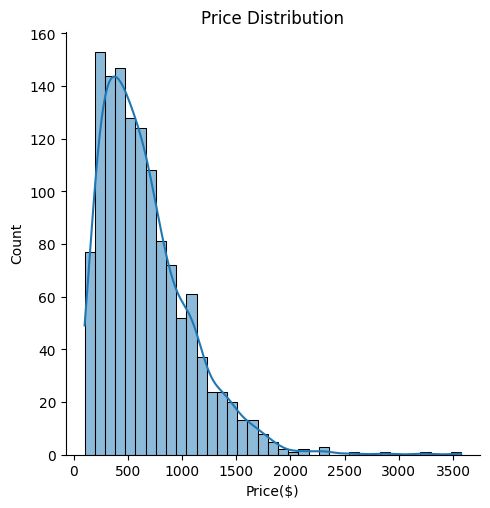

In [261]:
sns.displot(df['Price($)'], kde = True)
plt.title('Price Distribution')
plt.show()

<Axes: xlabel='Company'>

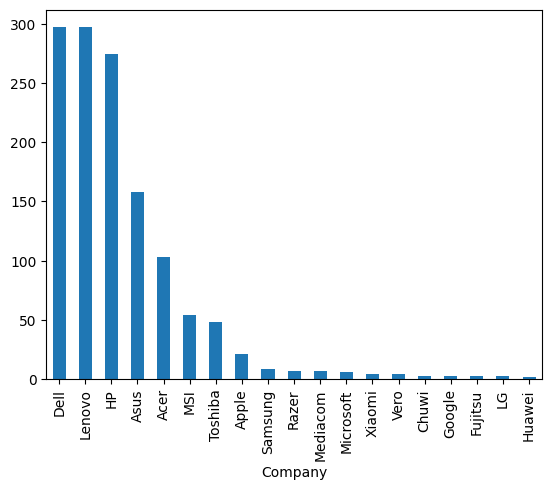

In [262]:
df['Company'].value_counts().plot(kind='bar')

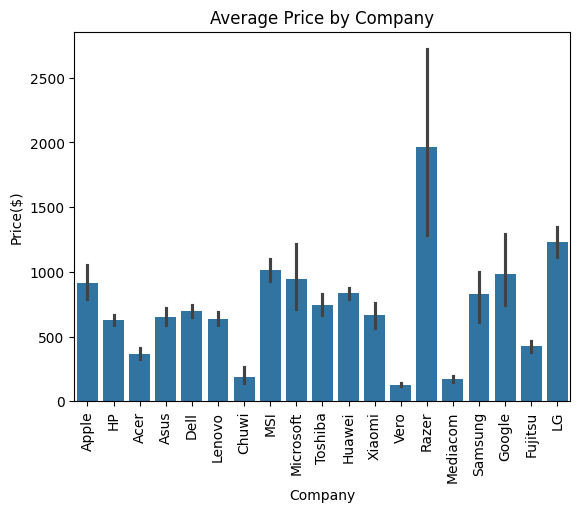

In [263]:
sns.barplot(x=df['Company'],y=df['Price($)']) # Bar plot of average price by company
plt.title('Average Price by Company')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

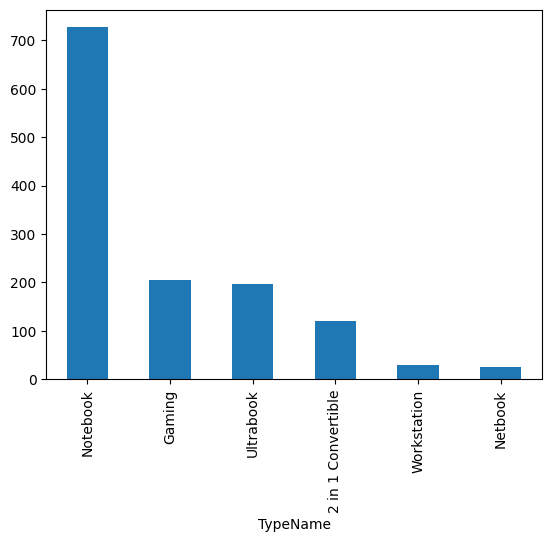

In [264]:
df['TypeName'].value_counts().plot(kind='bar') # Bar plot of laptop types

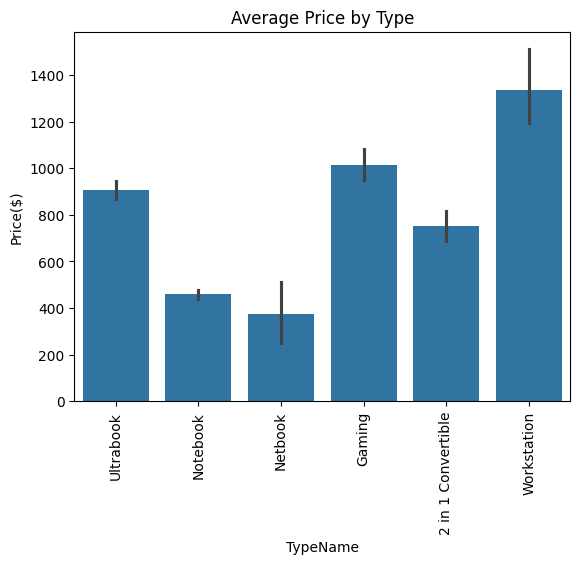

In [265]:
sns.barplot(x=df['TypeName'],y=df['Price($)'])
plt.title('Average Price by Type')
plt.xticks(rotation='vertical')
plt.show()

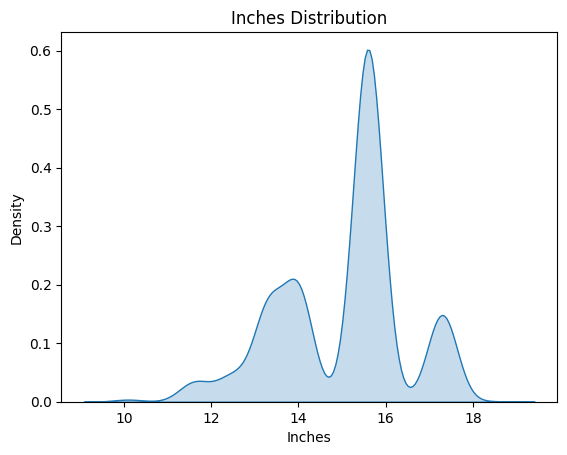

In [266]:
sns.kdeplot(df['Inches'], fill=True)
plt.title('Inches Distribution')
plt.show()

Text(0.5, 1.0, 'Price vs Inches')

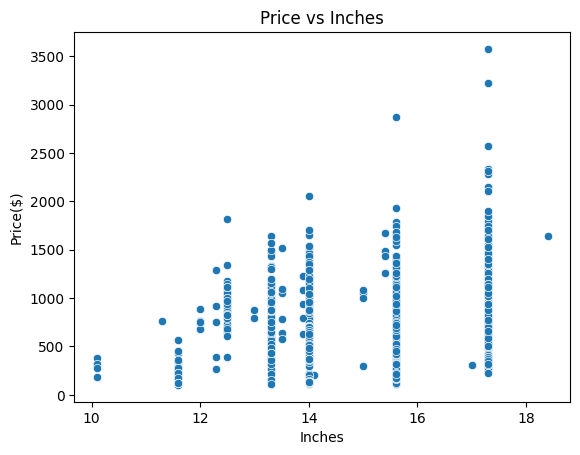

In [267]:
sns.scatterplot(x=df['Inches'],y=df['Price($)'])
plt.title('Price vs Inches')

Text(0.5, 1.0, 'Price vs RAM')

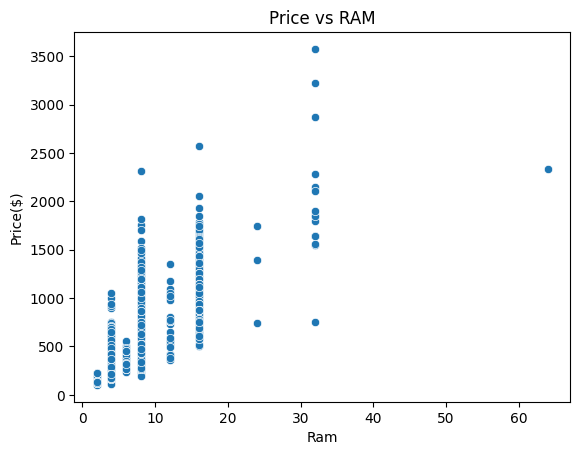

In [269]:
sns.scatterplot(x=df['Ram'],y=df['Price($)'])
plt.title('Price vs RAM')

Text(0.5, 1.0, 'Price vs RAM Boxplot')

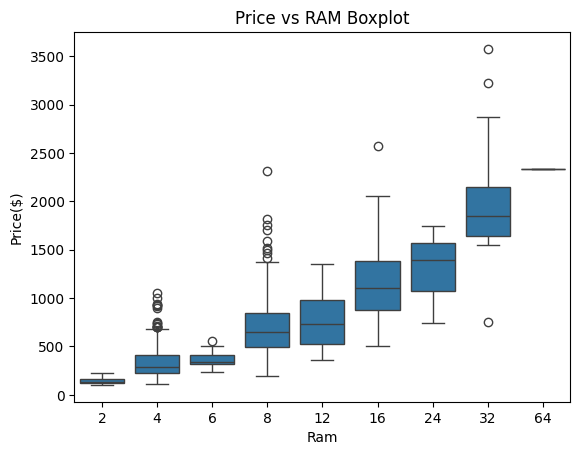

In [270]:
sns.boxplot(x=df['Ram'],y=df['Price($)'])
plt.title('Price vs RAM Boxplot')

In [271]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($)
903,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13,1200.877920
844,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 7,1.54,1095.969600
962,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,591.354720
1045,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD + 500GB HDD,Intel HD Graphics 520,Windows 10,1.84,1232.725507
685,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49,1649.082600


In [272]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [273]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [274]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen
647,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,1523.221920,0
709,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,AMD A10-Series 9620P 2.5GHz,6,2TB HDD,AMD Radeon 530,Windows 10,2.71,383.888261,0
628,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,1.50,374.510981,1
401,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,896.116320,0
206,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,257.289120,1


<Axes: xlabel='Touchscreen'>

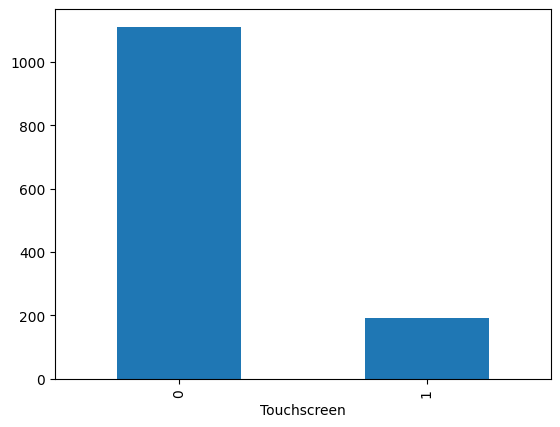

In [275]:
df['Touchscreen'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Average Price by Touchscreen')

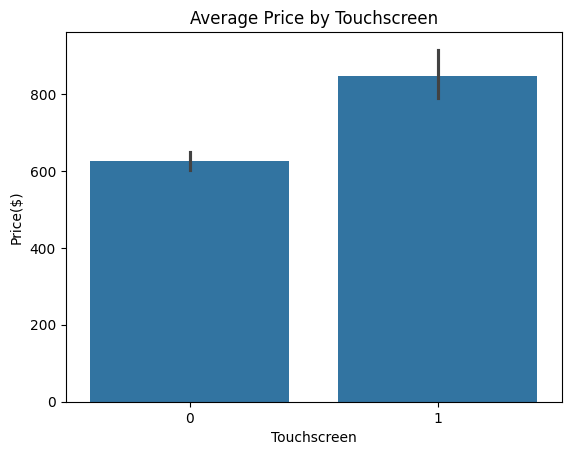

In [276]:
sns.barplot(x=df['Touchscreen'],y=df['Price($)'])
plt.title('Average Price by Touchscreen')

In [277]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [278]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1


<Axes: xlabel='Ips'>

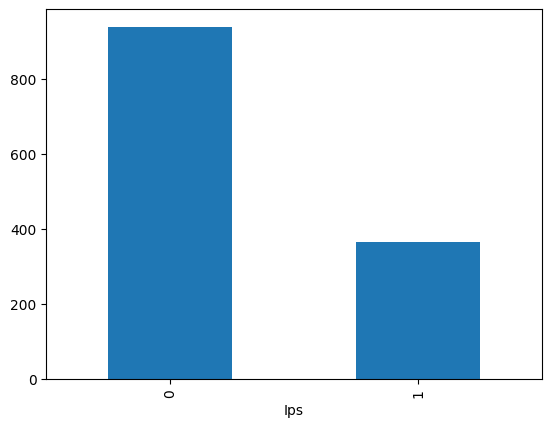

In [279]:
df['Ips'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Price vs IPS Display')

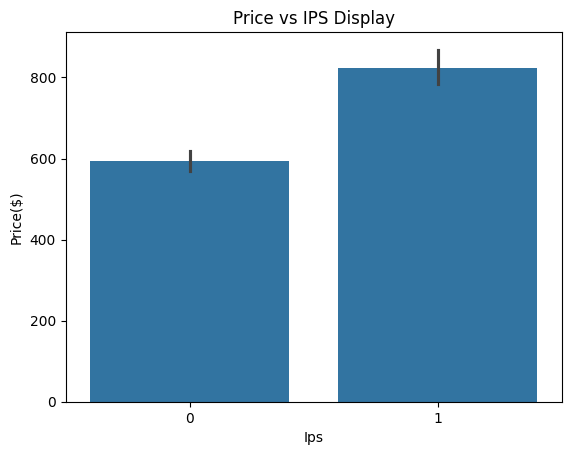

In [280]:
sns.barplot(x=df['Ips'],y=df['Price($)'])
plt.title('Price vs IPS Display')

In [281]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new .head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [282]:
df['X_res'] = new[0] # X resolution (width)
df['Y_res'] = new[1] # Y resolution (height)

In [283]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,X_res,Y_res
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.45,750.18240,0,0,Full HD 1920,1080
796,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.63,175.23792,0,0,1366,768
672,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.30,606.00672,1,1,IPS Panel Full HD / Touchscreen 1920,1080
541,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.60,431.27869,0,0,Full HD 1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,451.28160,0,1,IPS Panel Full HD 1920,1080


In [284]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]) # Extract numeric part

In [285]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,2560,1600


In [286]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price($)          1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 147.7+ KB


In [288]:
#df.corr()['Price($)']

df_numeric_only = df.drop(columns=['Company','TypeName','ScreenResolution','Cpu','Gpu','OpSys','Memory'])
correlation_with_price = df_numeric_only.corr()['Price($)']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price($)       1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price($), dtype: float64



---
Pixel Density:

Screen resolution strings were decomposed into horizontal and vertical pixel counts. Pixel density was computed using:


$$\text{PPI} = \frac{\sqrt{X_{\text{res}}^2 + Y_{\text{res}}^2}}{\text{Screen Size (inches)}}$$


This transformation compresses display quality into a single continuous variable that
more accurately reflects visual sharpness than raw resolution values.

---


In [289]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float') # Pixels Per Inch(ppi)

In [290]:
df_numeric_only = df.drop(columns=['Company','TypeName','ScreenResolution','Cpu','Gpu','OpSys','Memory'])
correlation_with_price = df_numeric_only.corr()['Price($)']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price($)       1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price($), dtype: float64


In [291]:
df.drop(columns=['ScreenResolution'],inplace=True)


In [292]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [293]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005


In [294]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [295]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [296]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5


In [297]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [298]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [299]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

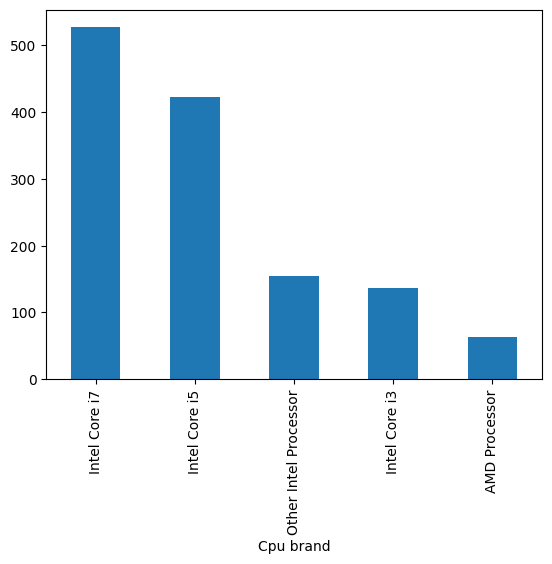

In [300]:
df['Cpu brand'].value_counts().plot(kind='bar')

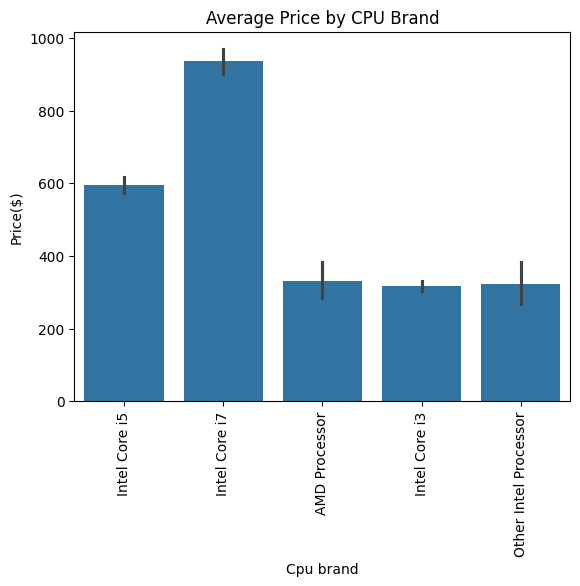

In [301]:
sns.barplot(x=df['Cpu brand'],y=df['Price($)'])
plt.title('Average Price by CPU Brand')
plt.xticks(rotation='vertical')
plt.show()

In [302]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [303]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

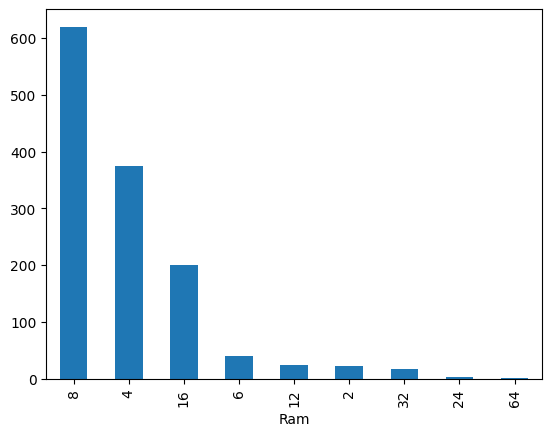

In [304]:
df['Ram'].value_counts().plot(kind='bar')

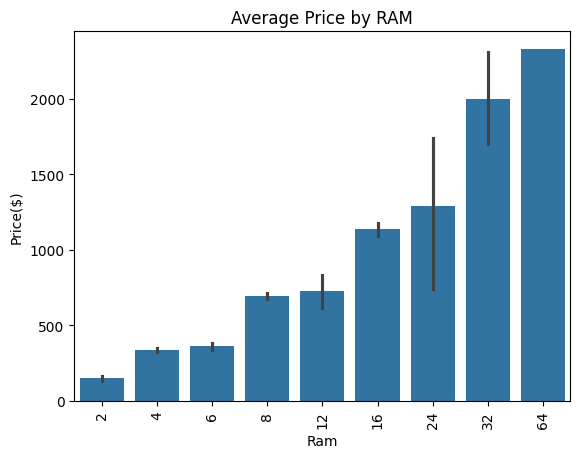

In [305]:
sns.barplot(x=df['Ram'],y=df['Price($)'])
plt.xticks(rotation='vertical')
plt.title('Average Price by RAM')
plt.show()

In [307]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [308]:
# Convert Memory column to string and clean up text
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

# Split Memory column into two parts based on '+'
new = df['Memory'].str.split('+', n=1, expand=True)

# Handle first and second parts
df['first'] = new[0].str.strip()
df['second'] = new[1]

# Create layer indicators for first part
df['Layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Keep only numeric values in first
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Fill missing values in second part safely (fixes the warning)
df['second'] = df['second'].fillna('0')

# Create layer indicators for second part
df['Layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Keep only numeric values in second
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert to integers
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

# Compute total memory for each type
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

# Drop intermediate columns
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


In [309]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
506,Asus,Notebook,8,256 SSD + 1000 HDD,Intel HD Graphics 620,Windows 10,2.00,717.361920,0,0,141.211998,Intel Core i7,1000,256,0,0
440,Lenovo,Notebook,8,1000 HDD,AMD Radeon R4,Windows 10,2.80,304.175520,0,0,106.113062,AMD Processor,1000,0,0,0
725,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 620,No OS,1.90,287.120592,0,0,100.454670,Intel Core i5,1000,0,0,0
578,MSI,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,1599.412320,0,0,127.335675,Intel Core i7,1000,512,0,0
839,Asus,Notebook,8,128 HDD,Intel HD Graphics 620,Windows 10,2.30,345.787200,0,0,141.211998,Intel Core i5,128,0,0,0


In [310]:
df.drop(columns=['Memory'],inplace=True)

In [311]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256,0,0


In [312]:
#df.corr()['Price($)']
df_numeric_only = df.drop(columns=['Company','TypeName','Gpu','OpSys','Cpu brand'])
correlation_with_price = df_numeric_only.corr()['Price($)']
print(correlation_with_price)

Ram              0.743007
Weight           0.210370
Price($)         1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price($), dtype: float64


In [313]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [314]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256


In [315]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [316]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [317]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256,Intel


In [318]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [319]:
df = df[df['Gpu brand'] != 'ARM']

In [320]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

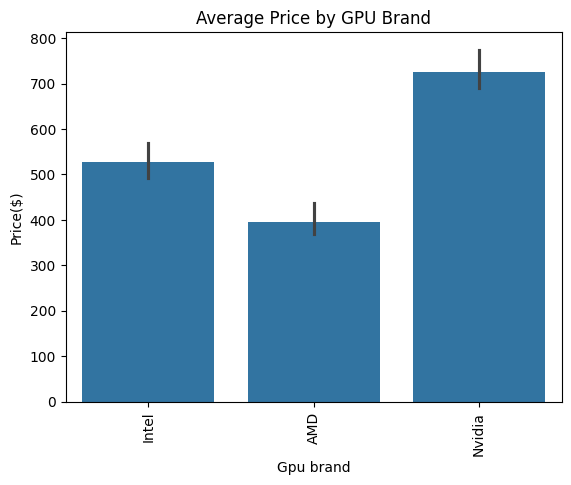

In [321]:
sns.barplot(x=df['Gpu brand'],y=df['Price($)'],estimator=np.median)
plt.title('Average Price by GPU Brand')
plt.xticks(rotation='vertical')
plt.show()

In [322]:
df.drop(columns=['Gpu'],inplace=True)

In [323]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256,Intel


In [324]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

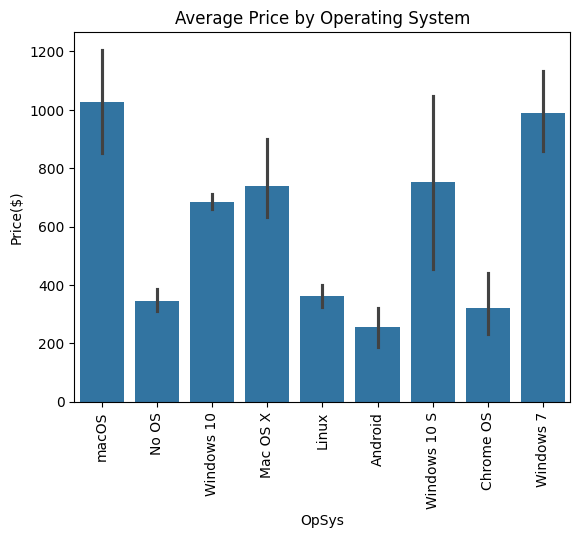

In [325]:
sns.barplot(x=df['OpSys'],y=df['Price($)'])
plt.title('Average Price by Operating System')
plt.xticks(rotation='vertical')
plt.show()

In [326]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [327]:
df['os'] = df['OpSys'].apply(cat_os)

In [328]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [329]:
df.drop(columns=['OpSys'],inplace=True)

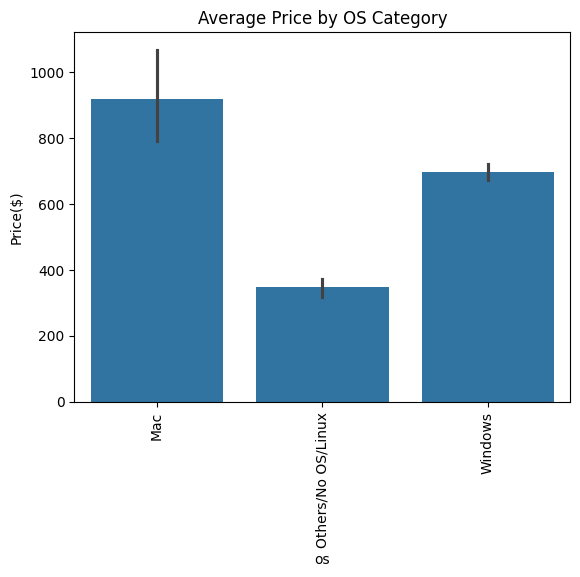

In [330]:
sns.barplot(x=df['os'],y=df['Price($)'])
plt.title('Average Price by OS Category')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

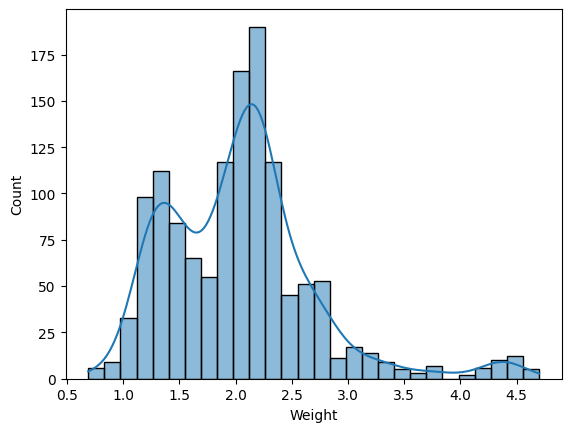

In [331]:
#sns.distplot(df['Weight'])
sns.histplot(df['Weight'], kde = True)

Text(0.5, 1.0, 'Price vs Weight')

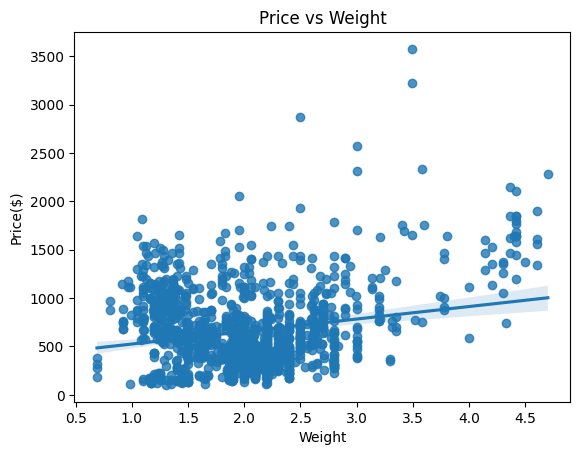

In [332]:
#sns.scatterplot(x=df['Weight'],y=df['Price($)'])
sns.regplot(x=df['Weight'],y=df['Price($)'])
plt.title('Price vs Weight')

In [333]:
df.head()

,Company,TypeName,Ram,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [334]:
#df.corr()['Price']
df_numeric_only = df.drop(columns=['Company','TypeName','Gpu brand', 'Cpu brand','os'])
correlation_with_price = df_numeric_only.corr()['Price($)']
print(correlation_with_price)

Ram            0.742905
Weight         0.209867
Price($)       1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price($), dtype: float64


In [335]:
df_numeric_only.corr()

,Ram,Weight,Price($),Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price($),0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


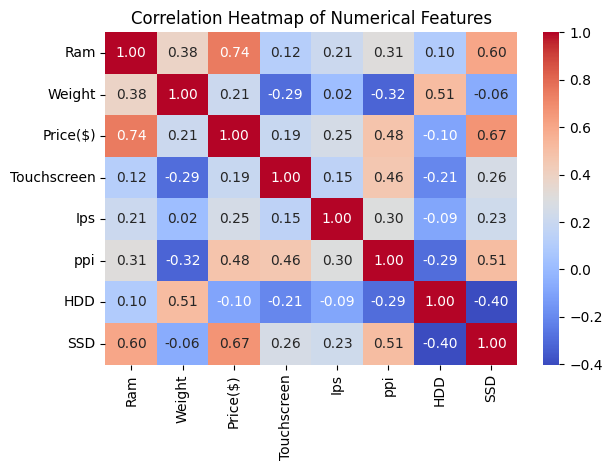

In [336]:
sns.heatmap(df_numeric_only.corr(), fmt=".2f", annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

---
Here, the correlation analysis shows that Price($) is primarily driven by hardware performance and storage type. Ram (0.74), SSD (0.67), and PPI (0.48) exhibit the strongest positive relationships with price, confirming that laptops with more memory, faster solid-state storage, and higher-resolution displays command significantly higher prices. Touchscreen and IPS display features show only moderate influence, while HDD storage and Weight provide minimal predictive value and can be considered secondary factors. 
Overall, the data clearly indicates that premium laptops are defined by high RAM, SSD storage, and superior display quality, while basic physical attributes (such as weight or HDD capacity) contribute little to price determination. These insights align perfectly with modern laptop market trends and validate the importance of performance-centric components as the key price drivers.

---

<Axes: xlabel='Price($)', ylabel='Count'>

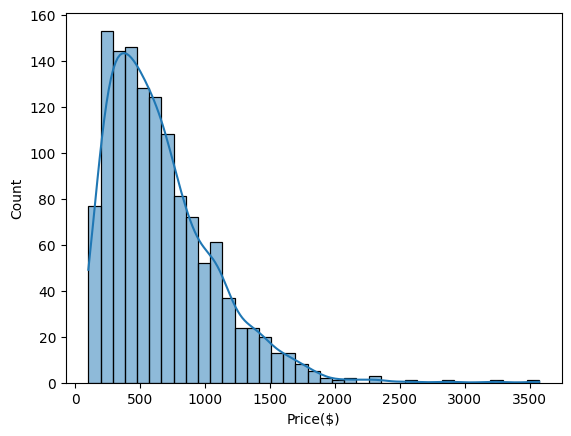

In [337]:
sns.histplot(df['Price($)'], kde = True)

<Axes: xlabel='Price($)', ylabel='Count'>

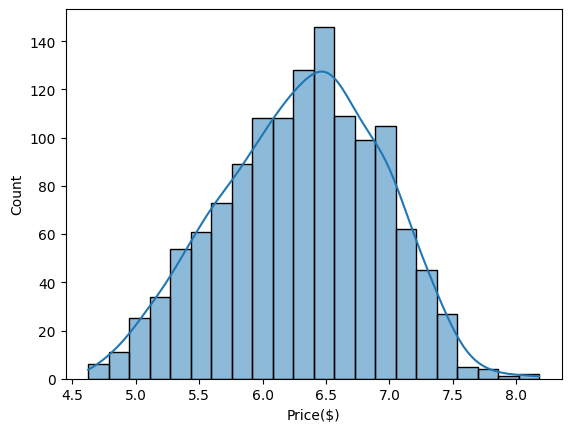

In [338]:
sns.histplot(np.log(df['Price($)']), kde=True)

In [339]:
X = df.drop(columns=['Price($)'])
y = np.log(df['Price($)'])

In [340]:
X.sample(5)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
202,Acer,Notebook,8,2.23,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
660,Dell,Notebook,8,1.56,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
144,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,0,256,AMD,Windows
90,Asus,Gaming,8,2.45,0,0,141.211998,AMD Processor,1000,0,AMD,Windows
588,Lenovo,Notebook,12,2.20,1,0,100.454670,Intel Core i7,1000,0,Intel,Windows


In [341]:
y.sample(5)

616     5.809581
1244    6.468757
1       6.266917
1144    6.960687
85      6.672820
Name: Price($), dtype: float64

Splitting Data into Training and Testing:

In [342]:
#pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [343]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1106, 12), (196, 12), (1106,), (196,))

---
 Before we begin training and testing datasets using different models, it's crucial to understand how we evaluate the model's predictions. 
 Following are the key Regression Evalution Metrics:

---

1. **Mean Absolute Error (MAE)**  

   MAE is the average of the absolute differences between the actual values and the predicted values. It tells us, on average, how much our predictions are "off" from the actual values.  

2. **Mean Squared Error (MSE)**

    MSE is the average of the squared differences between actual and predicted values. By squaring the differences, it penalizes larger errors more heavily than smaller ones.

3. **Root Mean Squared Error (RMSE)**

    RMSE is the square root of MSE. It brings the units back to the same scale as the original target variable, making it easier to interpret than MSE.

4. **R² (R-squared)**

    R² measures how well the independent variables explain the variance in the target variable.  It typically ranges from 0 to 1, where 1 is a perfect fit, though it can be negative if the model is worse than a simple horizontal line.
    
   


---

In [344]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [345]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [346]:
df.head()

,Company,TypeName,Ram,Weight,Price($),Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,785.165515,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,526.850755,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,336.996000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,1487.148696,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1057.053888,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


### Linear regression

In [347]:
from sklearn import metrics

step1 = ColumnTransformer(transformers=[

    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe_lr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_lr.fit(X_train,y_train)

y_pred = pipe_lr.predict(X_test)



print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
#print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.2101782795301909
RMSE: 0.27149030716387595
R²(R-squared): 0.8073277450155156


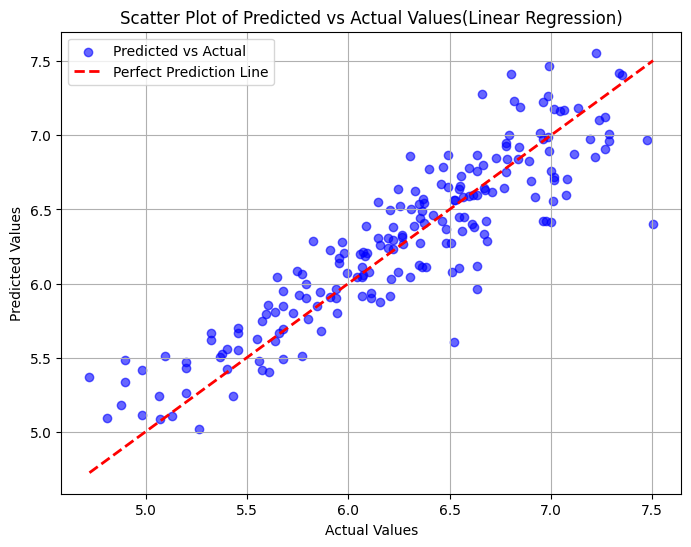

In [348]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

### Ridge Regression

In [349]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe_rr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rr.fit(X_train,y_train)

y_pred = pipe_rr.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.20926802210371512
RMSE: 0.2676549289503421
R²(R-squared): 0.8127331033739449


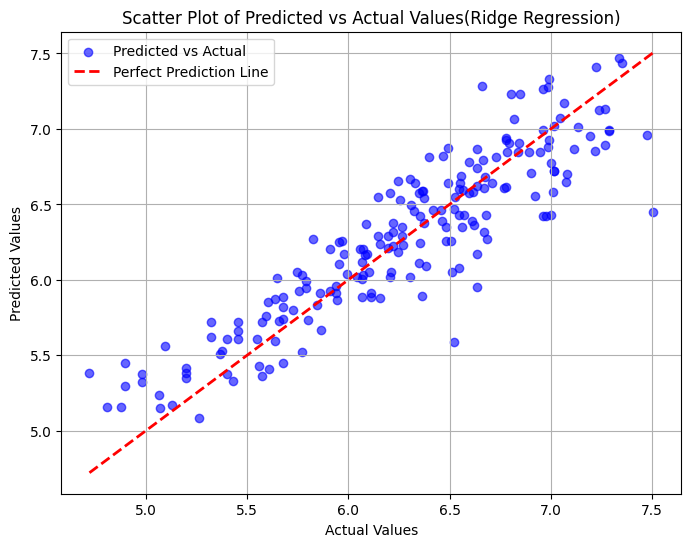

In [350]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(Ridge Regression)")
plt.legend()
plt.grid(True)
plt.show()

### Lasso Regression

In [351]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_LSR = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_LSR.fit(X_train,y_train)

y_pred = pipe_LSR.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.21114361575113458
RMSE: 0.27159057997800434
R²(R-squared): 0.8071853947620581


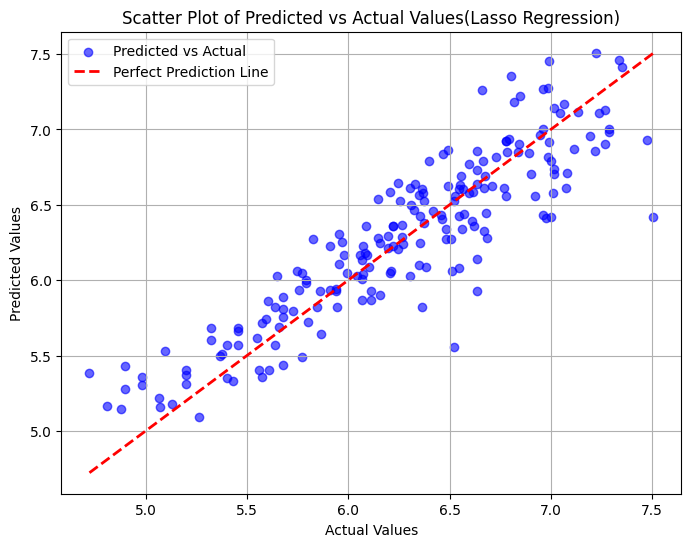

In [352]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(Lasso Regression)")
plt.legend()
plt.grid(True)
plt.show()

### KNN

In [353]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe_KNN = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_KNN.fit(X_train,y_train)

y_pred = pipe_KNN.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.19268746498695266
RMSE: 0.2744521873635883
R²(R-squared): 0.8031008164264898


### Decision Tree

In [354]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe_DT = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_DT.fit(X_train,y_train)

y_pred = pipe_DT.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.18775503664920073
RMSE: 0.25748543916310845
R²(R-squared): 0.8266930928630778


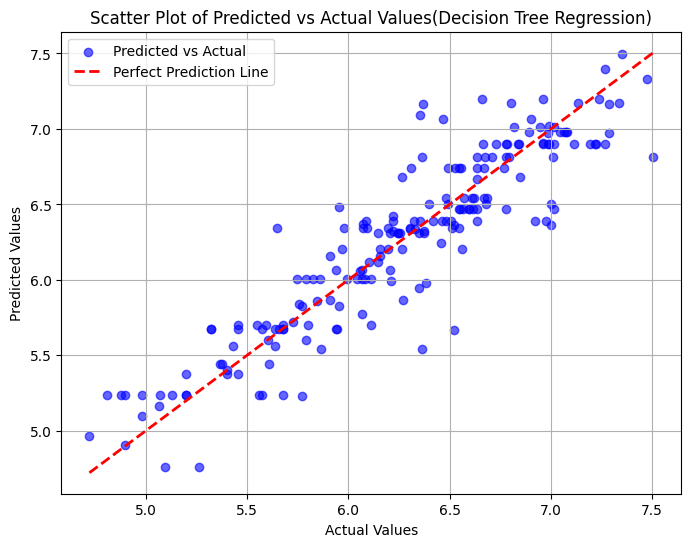

In [355]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(Decision Tree Regression)")
plt.legend()
plt.grid(True)
plt.show()

### Support Vector Regressor

In [356]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe_SVM = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_SVM.fit(X_train,y_train)

y_pred = pipe_SVM.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.2024040219084341
RMSE: 0.2708048306168396
R²(R-squared): 0.8082994598514031


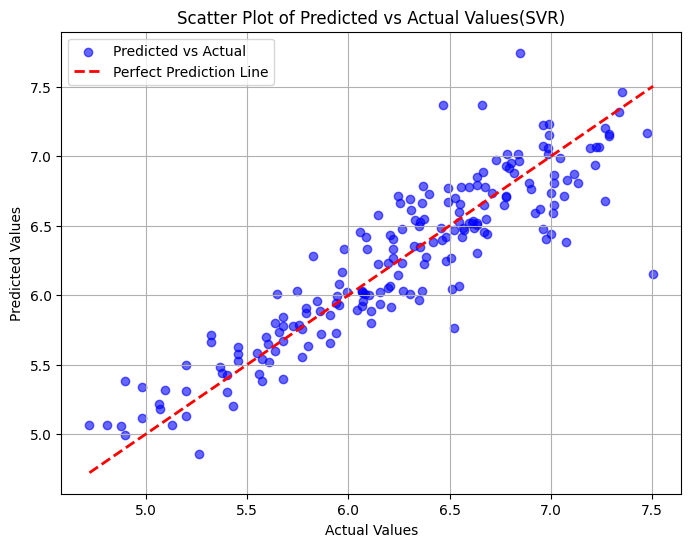

In [357]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a line of perfect predictions
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(SVR)")
plt.legend()
plt.grid(True)
plt.show()

### Random Forest

In [358]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe_RF = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_RF.fit(X_train,y_train)

y_pred = pipe_RF.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.1586001513997734
RMSE: 0.20788196937150788
R²(R-squared): 0.8870349321653292


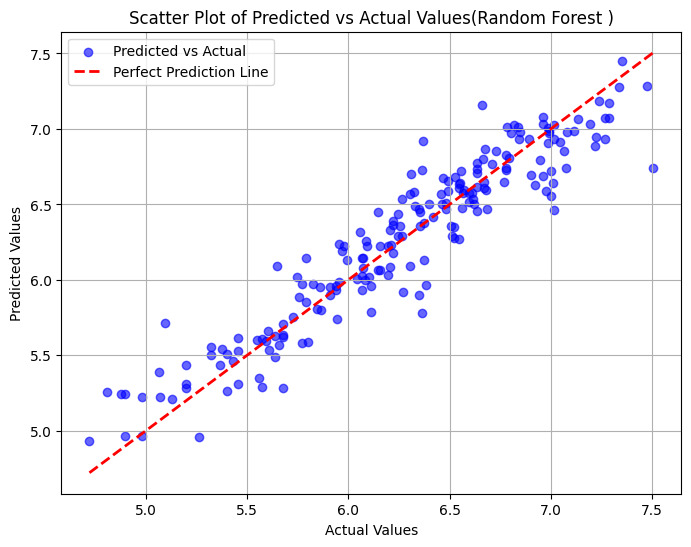

In [359]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')


plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(Random Forest )")
plt.legend()
plt.grid(True)
plt.show()

### AdaBoost

In [360]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe_AB = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_AB.fit(X_train,y_train)

y_pred = pipe_AB.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.2315814724130525
RMSE: 0.2916770550968102
R²(R-squared): 0.7776101020656437


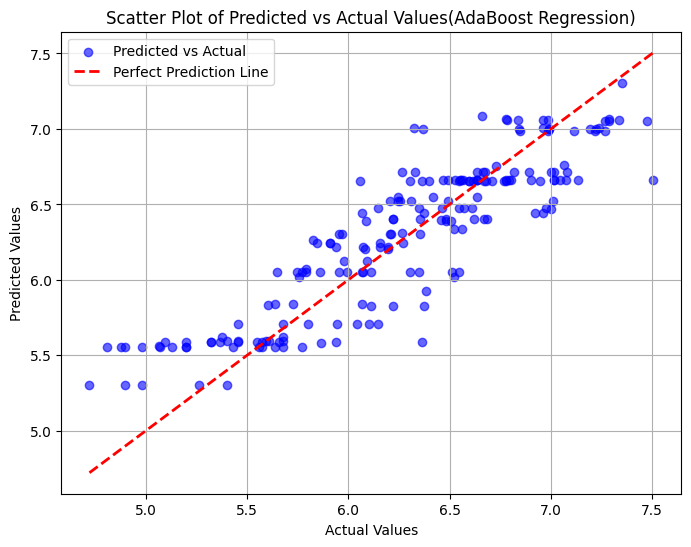

In [361]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')


plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(AdaBoost Regression)")
plt.legend()
plt.grid(True)
plt.show()

### Gradient Boost

In [362]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe_GB = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_GB.fit(X_train,y_train)

y_pred = pipe_GB.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.15949761880115015
RMSE: 0.21174604776538156
R²(R-squared): 0.8827963468602977


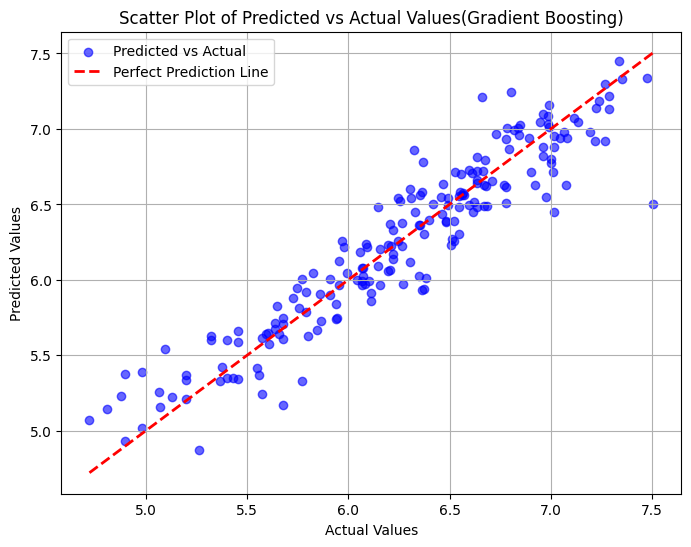

In [363]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')


plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.show()

### XgBoost

In [364]:
#!pip install xgboost
from xgboost import XGBRegressor



step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=300,max_depth=5,learning_rate=0.05)

pipe_XGB = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_XGB.fit(X_train,y_train)

y_pred = pipe_XGB.predict(X_test)

print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R²(R-squared):", r2_score(y_test,y_pred))

MAE: 0.15203814927606488
RMSE: 0.20641284741011245
R²(R-squared): 0.8886259603507032


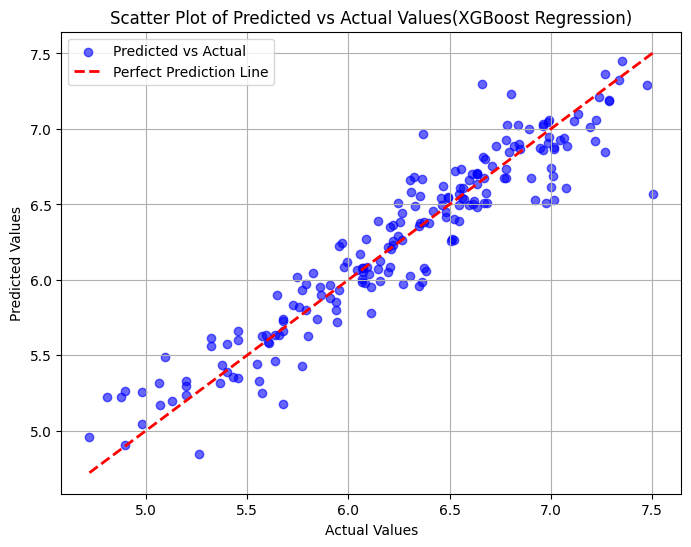

In [365]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')


plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot of Predicted vs Actual Values(XGBoost Regression)")
plt.legend()
plt.grid(True)
plt.show()

## Comparison of all Regression Model

---
Here, XGB demonstrates the best performance among all models, with the lowest errors (MAE, MSE, and RMSE) and the highest R², indicating that it explains 89% of the variance in the dataset effectively. So, `XGB` is the most suitable model for this dataset.

---

---
# Cross Validation:
Cross-validation is used to evaluate the performance of a machine learning model by dividing the dataset into multiple subsets (or folds) and training and testing the model on different portions of the data. It ensures that the model's performance is evaluated on unseen data and reduces the risk of overfitting.
Here, I am using **5-fold cross validation** (cv=5) for all above regression model.

---

In [366]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)


R² scores for each fold: [0.75222344 0.84725854 0.84941274 0.82870243 0.81190229]
Mean R² (CV): 0.8178998879011463
Std R² (CV): 0.03555573540885887


In [367]:
cv_scores = cross_val_score(pipe_rr, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.74782373 0.83145249 0.84016227 0.81256706 0.8061282 ]
Mean R² (CV): 0.8076267494172858
Std R² (CV): 0.03233969505542057


In [368]:
cv_scores = cross_val_score(pipe_LSR, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.74655962 0.83590591 0.84496579 0.8130262  0.80558849]
Mean R² (CV): 0.8092092020525847
Std R² (CV): 0.03447867965036588


In [369]:
cv_scores = cross_val_score(pipe_KNN, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.71132893 0.80829417 0.79799767 0.75631656 0.74655421]
Mean R² (CV): 0.7640983076085585
Std R² (CV): 0.03537060802605654


In [370]:
cv_scores = cross_val_score(pipe_SVM, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.78547554 0.84637756 0.85370792 0.78867801 0.73838007]
Mean R² (CV): 0.8025238214845369
Std R² (CV): 0.042754494110206674


In [371]:
cv_scores = cross_val_score(pipe_RF, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.84323936 0.87832052 0.869893   0.8892548  0.87809743]
Mean R² (CV): 0.8717610194577151
Std R² (CV): 0.015531796696386267


In [372]:
cv_scores = cross_val_score(pipe_AB, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.77220849 0.79053218 0.80580337 0.79153862 0.77181578]
Mean R² (CV): 0.7863796885361733
Std R² (CV): 0.012915630760458591


In [373]:
cv_scores = cross_val_score(pipe_GB, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.8316945  0.90396399 0.87895327 0.88360643 0.89750752]
Mean R² (CV): 0.8791451428407253
Std R² (CV): 0.02539549161434449


In [374]:
cv_scores = cross_val_score(pipe_XGB, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("R² scores for each fold:", cv_scores)
print("Mean R² (CV):", mean_r2)
print("Std R² (CV):", std_r2)

R² scores for each fold: [0.84488599 0.89541988 0.87538569 0.89054555 0.88721878]
Mean R² (CV): 0.8786911806573345
Std R² (CV): 0.01814834619535868


## Comparison of Cross Validation Result:

| Model Name                 | Mean R² |   SD        |
|----------------------------|---------|-------------|
| Linear Regression          | 0.818   |   0.0356    |
| Ridge Regression           | 0.8076  |   0.0323    |
| Lasso Regression           | 0.809   |   0.0345    |
|  KNN                       | 0.764   |   0.0345    |
| Support Vector regressor   | 0.803   |   0.0428    |
| Random Forest              | 0.872   |   0.0155    |
| ADA Boost                  | 0.7897  |   0.0101    |
| GB                         | 0.8786  |   0.0259    |
| XGB                        |0.8787   |   0.01801   |


---
On Comparision of all model, XGB is the best.


---